In [1]:
! pip install geopandas rioxarray xarray rasterio earthpy shapely

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 1.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 17.8 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.5/60.5 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 29.9 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 60.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 31.5 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 49.0 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9/97.9 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 71.6 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 79.3 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 71.1 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.5/313.5 kB 10.4 MB/s eta 

In [2]:
from glob import glob
import os
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
import geopandas as gpd
import rioxarray as rxr
import xarray as xr
from rasterio.plot import plotting_extent
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep
from shapely.geometry import box

In [3]:
data = et.data.get_data('cold-springs-fire')

Extracted output to /home/codespace/earth-analytics/data/cold-springs-fire/.


In [4]:
os.chdir(os.path.join(et.io.HOME, 'earth-analytics', 'data'))

In [5]:
modis_bands_pre_list = glob(os.path.join("cold-springs-fire",
                                         "modis",
                                         "reflectance",
                                         "07_july_2016",
                                         "crop",
                                         "*_sur_refl_b*.tif"))

modis_bands_pre_list

['cold-springs-fire/modis/reflectance/07_july_2016/crop/MOD09GA.A2016189.h09v05.006.2016191073856_sur_refl_b04_1.tif',
 'cold-springs-fire/modis/reflectance/07_july_2016/crop/MOD09GA.A2016189.h09v05.006.2016191073856_sur_refl_b03_1.tif',
 'cold-springs-fire/modis/reflectance/07_july_2016/crop/MOD09GA.A2016189.h09v05.006.2016191073856_sur_refl_b05_1.tif',
 'cold-springs-fire/modis/reflectance/07_july_2016/crop/MOD09GA.A2016189.h09v05.006.2016191073856_sur_refl_b07_1.tif',
 'cold-springs-fire/modis/reflectance/07_july_2016/crop/MOD09GA.A2016189.h09v05.006.2016191073856_sur_refl_b01_1.tif',
 'cold-springs-fire/modis/reflectance/07_july_2016/crop/MOD09GA.A2016189.h09v05.006.2016191073856_sur_refl_b02_1.tif',
 'cold-springs-fire/modis/reflectance/07_july_2016/crop/MOD09GA.A2016189.h09v05.006.2016191073856_sur_refl_b06_1.tif']

In [10]:
def combine_tifs(tif_list):
    """A function that combines a list of tifs in the same CRS
    and of the same extent into an xarray object

    Parameters
    ----------
    tif_list : list
        A list of paths to the tif files that you wish to combine.

    Returns
    -------
    An xarray object with all of the tif files in the listmerged into 
    a single object.

    """

    out_xr = []
    for i, tif_path in enumerate(tif_list):
        out_xr.append(rxr.open_rasterio(tif_path, masked=True).squeeze())
        out_xr[i]["band"] = i+1

    return xr.concat(out_xr, dim="band")

In [11]:
modis_bands_pre = combine_tifs(modis_bands_pre_list)

/home/codespace/.python/current/lib/python3.10/site-packages/earthpy/spatial.py:561: RuntimeWarning: invalid value encountered in cast
  return (bytedata.clip(low, high) + 0.5).astype("uint8")


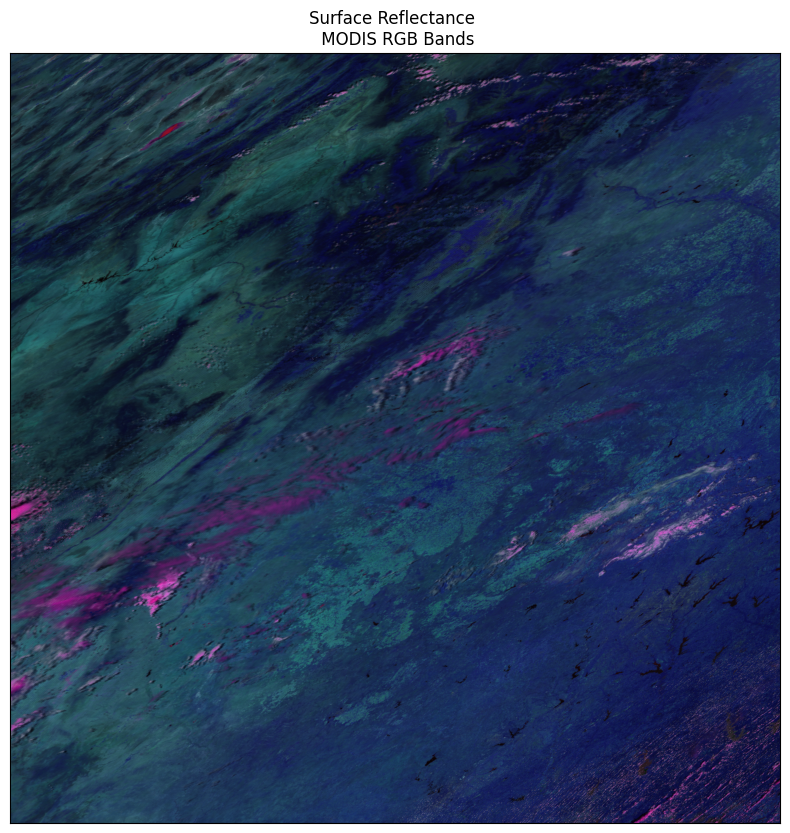

In [12]:
ep.plot_rgb(modis_bands_pre.values,
            rgb=[0, 3, 2],
            title="Surface Reflectance \n MODIS RGB Bands")
plt.show()